# <span style="color:#0b486b">  FIT5215: Deep Learning (2021)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Dr **Tuan Nguyen** | tuan.ng@monash.edu <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Sunthornjittanon**  <br/>
Firstname: **Pichaphop**    <br/>
Student ID: **31258301**    <br/>
Email: **psun0009@student.monash.edu**    <br/>
Your tutorial time: **Wed 4pm - 6pm & Fri 4pm - 6pm**    <br/>
***

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:00pm Sunday, 16 January 2022</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instruction carefully.

## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

**<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>**

**This part of the asssignment is designed to access your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).**

**The dataset we use for this part is a small animal dataset consisting of $5,000$ images of cats, dogs, fishes, lions, chickens, elephants, butterflies, cows, spiders, and horses, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder the folder `datasets\Animals` for you in the assignment folder.**

**Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:**

1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also help generate next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `Layers`: A class providing some static method to create basic CNN layers.
3. `DefaultModel`: A base class for the CNN model.
4. `YourModel`: The class you'll need to implement to build the CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`

Firstly, we need to run the following cells to load and preprocess the Animal dataset.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Install the packages

# install cv2
# !pip install opencv-python

# install imutils
# !pip install imutils

In [3]:
import numpy as np

In [4]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [5]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [6]:
# Create dict of label path {label : directory}
label_folder_dict= create_label_folder_dict("./datasets/Animals")

The below code helps to create a data manager that contains all relevant methods used to manage and process our experimental data. 

In [7]:
# Initialise pre-processing instance (crop the pictures)
sp = SimplePreprocessor(width=32, height=32)

# Initialise AnimalsDatasetManager instance
data_manager = AnimalsDatasetManager([sp])

# Load and pre-process the data
data_manager.load(label_folder_dict, verbose=100)

# Encode the labels
data_manager.process_data_label()

# Train, Valid and Test split
data_manager.train_valid_test_split()

butterfiles 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cats 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
chickens 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cows 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
elephants 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
horses 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
spiders 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Proc

Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. You can use them in training your developped models in the sequel.

In [8]:
# Print info about Train, Valid and Test datasets
print(data_manager.X_train.shape, data_manager.y_train.shape)
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

(4000, 32, 32, 3) (4000,)
(500, 32, 32, 3) (500,)
(500, 32, 32, 3) (500,)
['butterfiles' 'cats' 'chickens' 'cows' 'dogs' 'elephants' 'fishes'
 'horses' 'lions' 'spiders']


We now run the **default model** built in the **models.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated to a model developped in the DefaultModel class.

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

In [9]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.5)

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **models.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [10]:
network1.build_cnn()
network1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 8, 8, 64)         0         
 ePooling2D)                                          

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [11]:
network1.fit(data_manager, batch_size = 64, num_epochs = 20)

Epoch 1/20
63/63 [==============================] - 6s 93ms/step - loss: 2.2997 - accuracy: 0.1217 - val_loss: 2.2790 - val_accuracy: 0.1660
Epoch 2/20
63/63 [==============================] - 6s 90ms/step - loss: 2.3180 - accuracy: 0.1185 - val_loss: 2.3067 - val_accuracy: 0.0740
Epoch 3/20
63/63 [==============================] - 6s 88ms/step - loss: 2.3090 - accuracy: 0.0972 - val_loss: 2.3053 - val_accuracy: 0.0760
Epoch 4/20
63/63 [==============================] - 6s 91ms/step - loss: 2.3052 - accuracy: 0.0955 - val_loss: 2.3077 - val_accuracy: 0.0760
Epoch 5/20
63/63 [==============================] - 6s 91ms/step - loss: 2.3055 - accuracy: 0.0985 - val_loss: 2.3035 - val_accuracy: 0.0940
Epoch 6/20
63/63 [==============================] - 6s 93ms/step - loss: 2.3052 - accuracy: 0.0957 - val_loss: 2.3062 - val_accuracy: 0.0760
Epoch 7/20
63/63 [==============================] - 6s 100ms/step - loss: 2.3049 - accuracy: 0.0983 - val_loss: 2.3032 - val_accuracy: 0.0760
Epoch 8/20
6

Here you can compute the accuracy of your trained model with respect to a separate testing set.

In [12]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

8/8 [==============================] - 0s 24ms/step - loss: 2.3065 - accuracy: 0.0840


0.08399999886751175

Below shows how you can inspect the training progress.

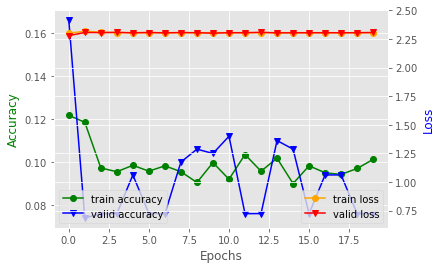

In [13]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [14]:
network1.predict(data_manager.X_test[0:10])

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

<Figure size 432x288 with 0 Axes>

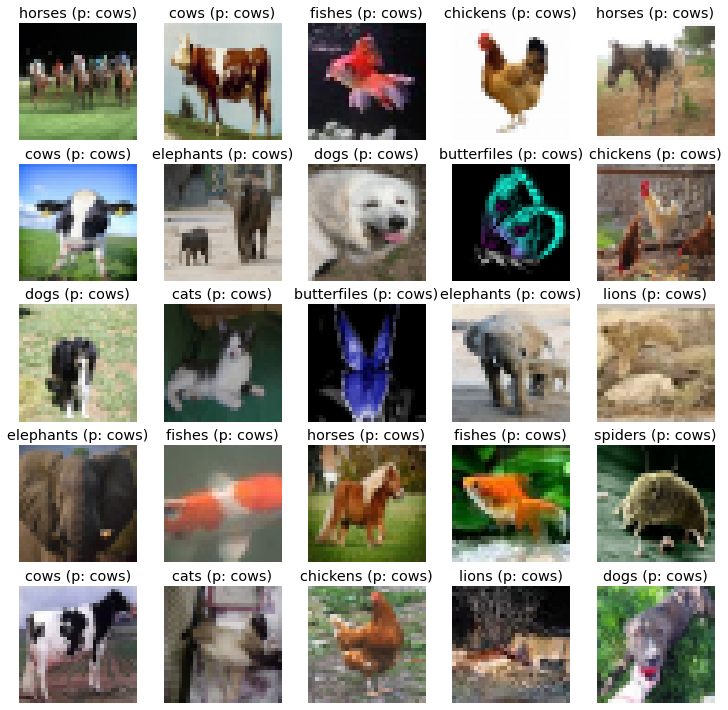

In [15]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

<span style="color:red">**Question 3.1**</span> **After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? what would you do to improve it?). Write your answer below.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*#Your answer and observation here*

From what we observe in the learning curve, we found that model performance on train and valid dataset did not show significant improvement as number of epoch increases. In other words, losses did not show decreasing trend and  accuracies did not show increasing trend in both datasets. Even in the last epoch (epoch = 20), the accuracy on valid set is only  around 15 %

so we can imply that the model perform poorly

One possible problem that can be observed is that loss on training set did not improve as the model learns more (epoch increases) even the objective of training is to minimise loss function. We check further on model configuration to look at hyperparameter in the model and we found that initial learning rate might be too high. High learning rate puts the model at risk of overshooting the minima making the model unbles to converge.

To further investigate our assumptions, we create another model (network1_tune) below with lower learning rate (0.1) given other hyperparameters the same.As a result, training loss clearly decreased as number of epoch increased with better accuracy shown in the plot below. At the end, the model with 0.1 learning (Valid accuracy around 50 %)performs much better than the previous model (Valid accuracy around 15 % ) so adjusting learning rate is proven to be a way to improve model performance.

In [16]:
# Train the model with lower learning rate (0.1)
network1_tune = DefaultModel(name='network1_tune',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.1,
                       verbose = False)
network1_tune.build_cnn()
# network1_tune.summary()
network1_tune.fit(data_manager, batch_size = 64, num_epochs = 20)


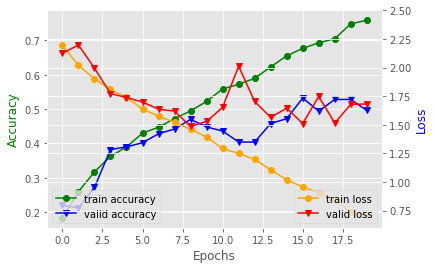

In [17]:
# Plot the progress on training
network1_tune.plot_progress()

**For question 3.2 to 3.6, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures as well as parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`, which you can find in function `__init__()` for the class `DefaultModel`:**

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

<span style="color:red">**Question 3.2**</span> **Write the code of the `YourModel` class here. Note that this class will inherit from the `DefaultModel` class. You'll only need to re-write the code for the `build_cnn` method for the `YourModel` class from the cell below which is inherited from the `DefaultModel` class.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [19]:
class YourModel(DefaultModel):
    
    # Init Attributes
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True):
        
         # Inherit DefaultModel Attributes
        super(YourModel, self).__init__(name, width, 
                                        height, depth,
                                        num_blocks, feature_maps, 
                                        num_classes, drop_rate, 
                                        batch_norm, is_augmentation, 
                                        activation_func, optimizer,
                                        batch_size, num_epochs, learning_rate, verbose)
    
    def build_cnn(self):
        #Insert your code here
        self.model = models.Sequential()

        # Each block has the pattern [conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]
        for i in range(self.num_blocks):
            
            # Conv layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same', input_shape=(32,32,3)))
            
            # Batch norm layer if Batch_norm is not none
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            
            # Activation layer
            self.model.add(layers.Activation(self.activation_func))
            
            # Conv layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same'))
            
            # Batch norm layer if batch_norm is not none
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            
            # Activation layer
            self.model.add(layers.Activation(self.activation_func))
            
            # Mean pool layer
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
            
            # Dropout layer
            self.model.add(layers.Dropout(rate=self.drop_rate))
        
        # Flatenning layer
        self.model.add(layers.Flatten())
        
        # Dense Layer
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))
        
        # Compile the model
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        

<span style="color:red">**Question 3.3**</span> **Once writing your own models, you should be able to use it to experiment with dropout or batch normalization. In this question, you'll use your model to finetune the dropout rate. Report the `drop_rate` rates you tried along with the validation accuracy for each rate (recomended range: 0.2 to 0.5) and show the losses during training. What is the final `drop_rate` rate that you'll use? Did dropout improve performance? Did it help reduce overfitting? Note that in this experiment, you should set `batch_norm` to `None`, meaning that we do not use the batch normalization.**
    
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

#*Write your answer and observation here*

In this part, we use **drop rates from 0 to 0.5** to tune hyperparameters (set batch_norm to None) selecting the  best model where validation accuracy is highest, which we have :

- Valid Accuracy of the model with drop rate= 0 (without batch norm) is 0.64
- Valid Accuracy of the model with drop rate= 0.1 (without batch norm) is 0.68
- Valid Accuracy of the model with drop rate= 0.2 (without batch norm) is 0.65
- Valid Accuracy of the model with drop rate= 0.3 (without batch norm) is 0.62
- Valid Accuracy of the model with drop rate= 0.4 (without batch norm) is 0.61
- Valid Accuracy of the model with drop rate= 0.5 (without batch norm) is 0.58

As a result, the model with **drop rate = 0.1** give us the best result at valid accuracy  around 68 %, which **improves model performance** (compare to droprate = 0 that has only 64 % valid accuracy). The model history plots belown also illustrated that models with higher droprate **reduce overfiting problems** as we can notice that when number of epoch increases the **gap between train and valid accuracy seems to be reduced** in models with higher drop rates.




In [20]:
%%time
##### Remark : This code takes some time  #####

# Create list of drop rate we want to try
drop_rate_list =[0,0.1,0.2,0.3,0.4,0.5]

# Initialise models list
models_list =[]
test_acc_list = []

# For each drop rate in the list
for drop_rate in drop_rate_list :
    
    print(f'\n---------- Start training model with drop rate = {drop_rate} ----------\n\n')
    
    # Initialise drop_out model with diff drop_rate and batch norm = None
    drop_out_network = YourModel(name=f'network2_withdroprate_{drop_rate}',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= drop_rate, # enter your final dropout rate value here
                     batch_norm= None ,     
                     optimizer='adam',
                     learning_rate= 0.001)
    
    # Build the model
    drop_out_network.build_cnn()
    
    # Fit the model and store training history
    drop_out_network.fit(data_manager, batch_size = 64, num_epochs = 20)
    history = drop_out_network.history
    
    test_acc= drop_out_network.compute_accuracy(data_manager.X_test, data_manager.y_test)
    
    # Append the training history to model list
    models_list.append(history)
    test_acc_list.append(test_acc)
    
#     valid_acc_list.append(drop_out_network.compute_accuracy(data_manager.X_test, data_manager.y_test))
#          drop_out_network.summary()
    print(f'\n---------- End training model with drop rate = {drop_rate} ----------\n\n')
    


---------- Start training model with drop rate = 0 ----------


Epoch 1/20
63/63 [==============================] - 13s 207ms/step - loss: 2.2384 - accuracy: 0.1680 - val_loss: 2.1181 - val_accuracy: 0.2220
Epoch 2/20
63/63 [==============================] - 13s 206ms/step - loss: 2.0109 - accuracy: 0.2670 - val_loss: 1.8995 - val_accuracy: 0.2940
Epoch 3/20
63/63 [==============================] - 13s 206ms/step - loss: 1.8627 - accuracy: 0.3165 - val_loss: 1.7552 - val_accuracy: 0.3300
Epoch 4/20
63/63 [==============================] - 14s 217ms/step - loss: 1.7623 - accuracy: 0.3495 - val_loss: 1.7639 - val_accuracy: 0.3300
Epoch 5/20
63/63 [==============================] - 14s 220ms/step - loss: 1.6762 - accuracy: 0.3805 - val_loss: 1.5799 - val_accuracy: 0.4260
Epoch 6/20
63/63 [==============================] - 13s 214ms/step - loss: 1.5948 - accuracy: 0.4168 - val_loss: 1.5320 - val_accuracy: 0.4620
Epoch 7/20
63/63 [==============================] - 13s 214ms/step - loss: 1.

63/63 [==============================] - 14s 217ms/step - loss: 1.0797 - accuracy: 0.6070 - val_loss: 1.2345 - val_accuracy: 0.6060
Epoch 15/20
63/63 [==============================] - 14s 217ms/step - loss: 1.0027 - accuracy: 0.6295 - val_loss: 1.2869 - val_accuracy: 0.5840
Epoch 16/20
63/63 [==============================] - 14s 222ms/step - loss: 0.9327 - accuracy: 0.6618 - val_loss: 1.2143 - val_accuracy: 0.5960
Epoch 17/20
63/63 [==============================] - 14s 218ms/step - loss: 0.8843 - accuracy: 0.6718 - val_loss: 1.2171 - val_accuracy: 0.6220
Epoch 18/20
63/63 [==============================] - 14s 220ms/step - loss: 0.8304 - accuracy: 0.6998 - val_loss: 1.3096 - val_accuracy: 0.6140
Epoch 19/20
63/63 [==============================] - 14s 218ms/step - loss: 0.7828 - accuracy: 0.7200 - val_loss: 1.2181 - val_accuracy: 0.6380
Epoch 20/20
8/8 [==============================] - 0s 37ms/step - loss: 1.1966 - accuracy: 0.6280

---------- End training model with drop rate = 0.

63/63 [==============================] - 14s 228ms/step - loss: 1.8070 - accuracy: 0.3383 - val_loss: 1.8962 - val_accuracy: 0.3220
Epoch 7/20
63/63 [==============================] - 14s 222ms/step - loss: 1.7231 - accuracy: 0.3780 - val_loss: 1.6291 - val_accuracy: 0.3860
Epoch 8/20
63/63 [==============================] - 14s 217ms/step - loss: 1.6740 - accuracy: 0.3820 - val_loss: 1.8059 - val_accuracy: 0.3240
Epoch 9/20
63/63 [==============================] - 14s 224ms/step - loss: 1.6184 - accuracy: 0.4080 - val_loss: 1.6732 - val_accuracy: 0.3960
Epoch 10/20
63/63 [==============================] - 14s 215ms/step - loss: 1.5783 - accuracy: 0.4178 - val_loss: 1.5585 - val_accuracy: 0.4400
Epoch 11/20
63/63 [==============================] - 14s 224ms/step - loss: 1.5249 - accuracy: 0.4430 - val_loss: 1.4806 - val_accuracy: 0.4780
Epoch 12/20
63/63 [==============================] - 14s 225ms/step - loss: 1.5026 - accuracy: 0.4440 - val_loss: 1.4806 - val_accuracy: 0.4760
Epoch 1

In [21]:
# Show the model architecture (As drop rates vary, architecture does not change so we show only one drop_out_network summary)
drop_out_network.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_40 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_41 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 average_pooling2d_24 (Avera  (None, 16, 16, 32)       0         
 gePooling2D)                                                    
                                                                 
 dropout_20 (Dropout)        (None, 16, 16, 32)        0         
                                                     

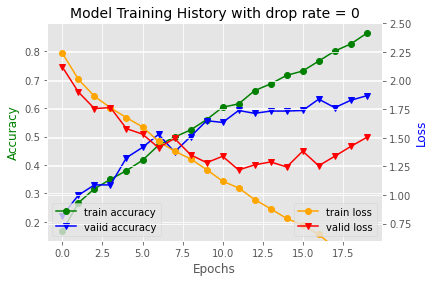

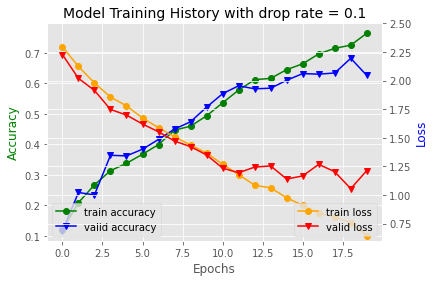

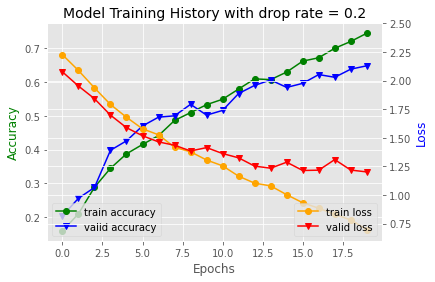

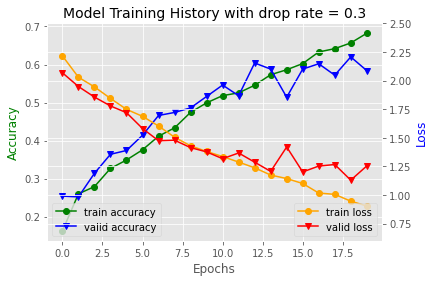

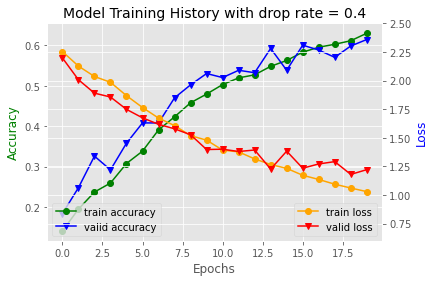

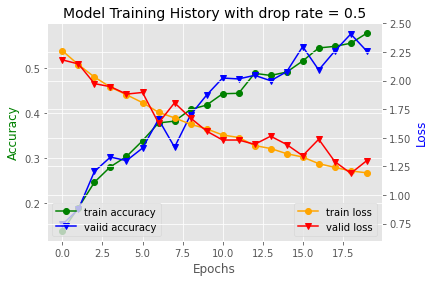

In [22]:
# Plot the Training History of Each model with diff drop rate

# For each model
for i in range(len(models_list)) :
    
    # Plot the progress
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(models_list[i].history['accuracy'], label='train accuracy', color='green', marker="o")
    ax1.plot(models_list[i].history['val_accuracy'], label='valid accuracy', color='blue', marker = "v")
    ax2.plot(models_list[i].history['loss'], label = 'train loss', color='orange', marker="o")
    ax2.plot(models_list[i].history['val_loss'], label = 'valid loss', color='red', marker = "v")
    ax1.legend(loc=3)
    
    plt.title(f'Model Training History with drop rate = {drop_rate_list[i]}', fontsize=14)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy', color='g')
    ax2.set_ylabel('Loss', color='b')
    ax2.legend(loc=4)
    plt.ylim([0.6, 2.5])
    plt.show()



In [23]:
# Create the vaild accuracy list
valid_acc_list = [] 

for i in range(len(drop_rate_list)):
    valid_acc_list.append(max(models_list[i].history['val_accuracy']))

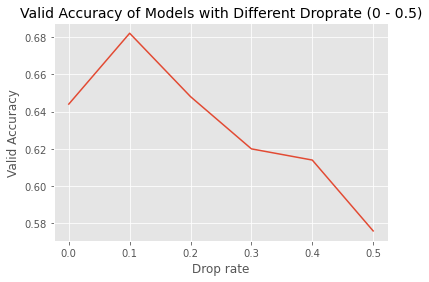

In [24]:
# Plot Diff Droprate VS Valid Accuracy

plt.plot(drop_rate_list, valid_acc_list)
plt.xlabel("Drop rate")
plt.ylabel("Valid Accuracy")
plt.title("Valid Accuracy of Models with Different Droprate (0 - 0.5)", fontsize=14)
plt.grid(True)
plt.show()

In [25]:
# Report Valid and Test Accuracy
droprate_valid_acc_list =[]
print('-------------------------- Valid Accuracy  -------------------------- \n')

print('\n------- Different Droprates ------- \n')
for i in range(len(drop_rate_list)):
    drop_rate_i = drop_rate_list[i]
    droprate_valid_acc= round(max(models_list[i].history['val_accuracy']),2)
    droprate_valid_acc_list.append(droprate_valid_acc)
    print(f' Valid Accuracy of the model with drop rate= {drop_rate_i} (without batch norm) is {droprate_valid_acc}')

print('---------------------------------------------------------------------- \n\n')
print('-------------------------- Test Accuracy  -------------------------- \n')

print('\n------- Different Droprates ------- \n')
for i in range(len(drop_rate_list)):
    drop_rate_i = drop_rate_list[i]
    droprate_test_acc= round(test_acc_list[i],2)
    
    print(f' Test Accuracy of the model with drop rate = {drop_rate_i} (without batch norm) is {droprate_test_acc}')
print('---------------------------------------------------------------------- \n\n')

-------------------------- Valid Accuracy  -------------------------- 


------- Different Droprates ------- 

 Valid Accuracy of the model with drop rate= 0 (without batch norm) is 0.64
 Valid Accuracy of the model with drop rate= 0.1 (without batch norm) is 0.68
 Valid Accuracy of the model with drop rate= 0.2 (without batch norm) is 0.65
 Valid Accuracy of the model with drop rate= 0.3 (without batch norm) is 0.62
 Valid Accuracy of the model with drop rate= 0.4 (without batch norm) is 0.61
 Valid Accuracy of the model with drop rate= 0.5 (without batch norm) is 0.58
---------------------------------------------------------------------- 


-------------------------- Test Accuracy  -------------------------- 


------- Different Droprates ------- 

 Test Accuracy of the model with drop rate = 0 (without batch norm) is 0.59
 Test Accuracy of the model with drop rate = 0.1 (without batch norm) is 0.58
 Test Accuracy of the model with drop rate = 0.2 (without batch norm) is 0.63
 Test A

In [26]:
# Get the best droprate based on valid performance
best_droprate = drop_rate_list[np.argmax(droprate_valid_acc_list)]


<span style="color:red">**Question 3.4**</span> **Now, let's try using batch normalization. What is the validation and test result? Does it improve the model? How does it compare to the model using dropout? To have a fair comparison, in this experiment, we set `drop_rate=0` to not use the dropout. You should show the training progress of losses and accuracies and comment about those plots. You can further comment about the efficiency of dropout and batch norm for your training.**
 
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

#*Write your answer and observation here*

The model with batch norm improves the performance since the valid accuracy of the model with batch norm  gets **higher valid accuracy (69%) than that of the model without batch norm (64 %)**. Also, the test accuracy of both models are around 67 % (with batch norm) and 55% (without batch norm). Compare to adjusting drop rate, **including batch norm layers (valid acc = 69%) seems to provide a better valid accuracy than setting drop rate = 0.1 (valid acc = 68%)**. 

During the training process, including batch norm seems to create larger gap between train and valid accuracies. However, the model can learn better as we can see that training accuracy is almost 100 % in the last epoach so even the gap between the train and vaild accuracy is larger, the valid accuracy is still higher that of the model without batch norm.

For the efficiency of dropout and batch norm for training, including batch norm seems to be more efficient since we don't have to finetune the model hyperparameters like drop rate that happens to the models with dropout so the training time for training the models with and without batch norm is less than finding the optimal drop rate.  

In [27]:
# Create the model with batch norm
batch_norm_network = YourModel(name='network3',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     learning_rate= 0.001)

batch_norm_network.build_cnn()
batch_norm_network.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation_48 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_57 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_49 (Activation)  (None, 32, 32, 32)      

In [28]:
# Create the model without batch norm
without_batch_norm_network = YourModel(name='network3_benchmark',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0, 
                     batch_norm=None, #do batch norm    
                     optimizer='adam',
                     learning_rate= 0.001)

without_batch_norm_network.build_cnn()
# without_batch_norm_network.summary()

In [29]:
%%time
# Fit the model
print('\n------Start Training Model with Batch Norm------\n\n')
batch_norm_network.fit(data_manager, batch_size = 64, num_epochs = 20)

print('\n------End Training Model with Batch Norm------\n\n')


print('\n------Start Training Model without Batch Norm------\n\n')
without_batch_norm_network.fit(data_manager, batch_size = 64, num_epochs = 20)

print('\n------End Training Model without Batch Norm------\n\n')


------Start Training Model with Batch Norm------


Epoch 1/20
63/63 [==============================] - 16s 245ms/step - loss: 1.9869 - accuracy: 0.3402 - val_loss: 2.4102 - val_accuracy: 0.1100
Epoch 2/20
63/63 [==============================] - 15s 245ms/step - loss: 1.5271 - accuracy: 0.4585 - val_loss: 2.3998 - val_accuracy: 0.1900
Epoch 3/20
63/63 [==============================] - 15s 244ms/step - loss: 1.3033 - accuracy: 0.5502 - val_loss: 2.8115 - val_accuracy: 0.1580
Epoch 4/20
63/63 [==============================] - 15s 244ms/step - loss: 1.1056 - accuracy: 0.6225 - val_loss: 2.6127 - val_accuracy: 0.2060
Epoch 5/20
63/63 [==============================] - 15s 245ms/step - loss: 0.9618 - accuracy: 0.6678 - val_loss: 2.2330 - val_accuracy: 0.3000
Epoch 6/20
63/63 [==============================] - 17s 269ms/step - loss: 0.8577 - accuracy: 0.7028 - val_loss: 1.8654 - val_accuracy: 0.4020
Epoch 7/20
63/63 [==============================] - 17s 262ms/step - loss: 0.7387 - accura

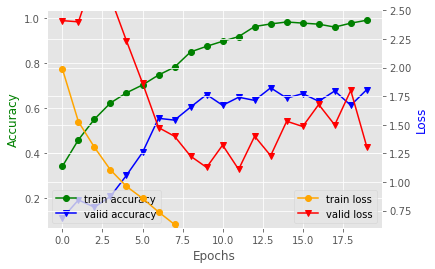

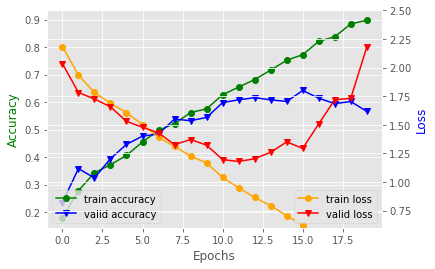

In [30]:
# Plot the training history
batch_norm_network.plot_progress()
without_batch_norm_network.plot_progress()

In [31]:
# Compute Valid acc
batch_norm_valid_acc = round(max(batch_norm_network.history.history['val_accuracy']),2)
without_batch_norm_valid_acc = round(max(without_batch_norm_network.history.history['val_accuracy']),2)

# Compute test acc
batch_norm_test_acc = round(batch_norm_network.compute_accuracy(data_manager.X_test, data_manager.y_test),2)
without_batch_norm_test_acc = round(without_batch_norm_network.compute_accuracy(data_manager.X_test, data_manager.y_test),2)

8/8 [==============================] - 0s 34ms/step - loss: 2.1009 - accuracy: 0.5500


In [32]:
# Report Valid and Test Accuracy

print('-------------------------- Valid Accuracy  -------------------------- \n')
print('------- With Batch Norm VS Without Batch Norm ------- \n')
print(f' Valid Accuracy of the model with batch norm (drop rate = 0) is {batch_norm_valid_acc}')
print(f' Valid Accuracy of the model without batch norm (drop rate = 0) is {without_batch_norm_valid_acc}')


print('\n------- Different Droprates ------- \n')
for i in range(len(drop_rate_list)):
    drop_rate_i = drop_rate_list[i]
    droprate_valid_acc= round(max(models_list[i].history['val_accuracy']),2)
    
    print(f' Valid Accuracy of the model with drop rate = {drop_rate_i} (without batch norm) is {droprate_valid_acc}')

print('---------------------------------------------------------------------- \n\n')
print('-------------------------- Test Accuracy  -------------------------- \n')


print('------- With Batch Norm VS Without Batch Norm ------- \n')
print(f' Test Accuracy of the model with batch norm (drop rate = 0) is {batch_norm_test_acc}')
print(f' Test Accuracy of the model without batch norm (drop rate = 0) is {without_batch_norm_test_acc}')


print('\n------- Different Droprates ------- \n')
for i in range(len(drop_rate_list)):
    drop_rate_i = drop_rate_list[i]
    droprate_test_acc= round(test_acc_list[i],2)
    
    print(f' Test Accuracy of the model with drop rate = {drop_rate_i} (without batch norm) is {droprate_test_acc}')
print('---------------------------------------------------------------------- \n\n')

-------------------------- Valid Accuracy  -------------------------- 

------- With Batch Norm VS Without Batch Norm ------- 

 Valid Accuracy of the model with batch norm (drop rate = 0) is 0.69
 Valid Accuracy of the model without batch norm (drop rate = 0) is 0.64

------- Different Droprates ------- 

 Valid Accuracy of the model with drop rate = 0 (without batch norm) is 0.64
 Valid Accuracy of the model with drop rate = 0.1 (without batch norm) is 0.68
 Valid Accuracy of the model with drop rate = 0.2 (without batch norm) is 0.65
 Valid Accuracy of the model with drop rate = 0.3 (without batch norm) is 0.62
 Valid Accuracy of the model with drop rate = 0.4 (without batch norm) is 0.61
 Valid Accuracy of the model with drop rate = 0.5 (without batch norm) is 0.58
---------------------------------------------------------------------- 


-------------------------- Test Accuracy  -------------------------- 

------- With Batch Norm VS Without Batch Norm ------- 

 Test Accuracy of t

<span style="color:red">**Question 3.5**</span> **We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also we need to incorporate early stopping to your training process. Specifically, we can early stop the training if the valid accuracy cannot increase in three consecutive epochs.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In this part, we extend the code of the class YourModel so that if the attribute is_augmentation is set to True and also incorporate early stopping to the training process.  We set early stop the training if the valid accuracy cannot increase in three consecutive epochs. The performance comparison will be done on Q3.6

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

Wtire your code in the cell below. Hint that you can rewrite the code of `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

In [34]:
class YourModel(DefaultModel):
    
    # Initialise
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate)
    
    # Create build_cnn method (Reuse from previous section)
    def build_cnn(self):
        
        #reuse code of previous section here
        self.model = models.Sequential()

        # Each block has the pattern [conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]
        for i in range(self.num_blocks):
            
            # Conv layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same', input_shape=(32,32,3)))
            
            # Batch norm layer if Batch_norm is not none
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            
            # Activation layer
            self.model.add(layers.Activation(self.activation_func))
            
            # Conv layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same'))
            
            # Batch norm layer if batch_norm is not none
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            
            # Activation layer
            self.model.add(layers.Activation(self.activation_func))
            
            # Mean pool layer
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
            
            # Dropout layer
            self.model.add(layers.Dropout(rate=self.drop_rate))
        
        # Flatenning layer
        self.model.add(layers.Flatten())
        
        # Dense Layer
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))
        
        # Compile the model
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
    # Overwrite fit method 
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        
        #insert your code here
        
        # If batch size is not specified, used the default one
        batch_size = self.batch_size if batch_size is None else batch_size
        
        # If num_epochs is not specified, used the default one
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        
        # Create EarlyStopping object specified the conditions if the valid accuracy do not improve 3 times
        early_checkpoint = EarlyStopping(patience=3, monitor='val_accuracy', mode='max')
        
        # Put early stoping in callbacks list
        callbacks = [early_checkpoint]
        
        
        # If is_augmentation is True
        if self.is_augmentation :
            
            print(" Data Augmentation is True")
            # Generate more image data
            datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1,
                                         rotation_range=10, shear_range= 0.1, zoom_range= 0.1, fill_mode = 'nearest')
            
            # Fit to the training dataset
            datagen.fit(data_manager.X_train)
            it = datagen.flow(data_manager.X_train, data_manager.y_train, batch_size=32)
            batch_images, batch_labels = next(it)
            
            # Fit the model with training dataset with data augmentation
            self.history = self.model.fit(it, 
                                          validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                          epochs = num_epochs,
                                          batch_size = batch_size, 
                                          verbose= self.verbose,
                                          callbacks=callbacks)
        # If is_augmentation is False
        else :
            print(" ----Data Augmentation is False------")
            # Fit the model with original training dataset
            self.history = self.model.fit(x = data_manager.X_train, y = data_manager.y_train, 
                                          validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                          epochs = num_epochs, 
                                          batch_size = batch_size, 
                                          verbose= self.verbose,
                                          callbacks=callbacks)

<span style="color:red">**Question 3.6**</span> **Leverage the data augmentation with dropout and batch norm, and try to observe if you can really boost the performance.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

#*Write your answer and observation here*

So far, our best model is the model with batch norm and drop rate = 0 (valid acc = 69%)

In this part, we will leverage those three hyperparameters (data augmentation, drop rate and batch norm) to experiment 2 models further, which are :

1. Model with batch norm = True and drop rate = The best drop rate from previous section given other constant and try data and adding early stopping

2. Model with best parameters(Batch norm + droprate) with data augmentation and adding early stopping (horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1,rotation_range=10, shear_range= 0.1, zoom_range= 0.1, fill_mode = 'nearest')
                                         
As a result, the model with batch norm and drop rate = 0 without data augmentation(valid acc = 0.69) perform the best.

In general, doing data augmentation is supposed to potentially increase model performance since the main idea of data augmentation tries to generate more general dataset. However, it does not happen to our case, which we get valid accuracy = 57 %(worse than previous model) so we research more about effects on data augmentation (references are given below). I found several answer from the stack overflow, which are

" It has simply too small capacity and it's not able to learn all the patterns in your data. Second - that you have not enough examples - and when you add the flipped image it turned out that it in fact memoized loads of your traning cases. Another thing is that maybe you learnt it for a too small amount of time and setting the number of iterations to a bigger value might be a good idea. "
                                         

"In which case one should choose to augment data and should avoid?

When you don't have enough data -> augment
Avoid augmentations where you can't tell the emotion after the augmentation. So in case of character recognition, rotation is a bad idea (e.g. due to 6 vs 9 or u vs n or \rightarrow vs \nearrow) "


References:

https://stackoverflow.com/questions/42141540/image-augmentation-makes-performance-worse

https://stackoverflow.com/questions/46855082/does-image-augmentation-helps

In [35]:
# Build the model with the best drop rate in the previous section and batch norm = True
batch_droprate_network = YourModel(name='network4_batchdrop',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= best_droprate, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     learning_rate= 0.001,
                     is_augmentation = False)

batch_droprate_network.build_cnn()
# batch_droprate_network.summary()

In [36]:
%%time
# Fit the model

print('\n------Start Training Model with batch norm = True and drop rate = 0.1-----\n\n')
batch_droprate_network.fit(data_manager, batch_size = 64, num_epochs = 20)


------Start Training Model with batch norm = True and drop rate = 0.1-----


 ----Data Augmentation is False------
Epoch 1/20
63/63 [==============================] - 17s 250ms/step - loss: 2.0018 - accuracy: 0.3275 - val_loss: 2.3584 - val_accuracy: 0.2340
Epoch 2/20
63/63 [==============================] - 15s 243ms/step - loss: 1.5075 - accuracy: 0.4642 - val_loss: 2.3069 - val_accuracy: 0.2020
Epoch 3/20
63/63 [==============================] - 16s 257ms/step - loss: 1.3452 - accuracy: 0.5350 - val_loss: 2.2342 - val_accuracy: 0.2260
Epoch 4/20
63/63 [==============================] - 16s 259ms/step - loss: 1.1959 - accuracy: 0.5810 - val_loss: 2.3622 - val_accuracy: 0.2620
Epoch 5/20
63/63 [==============================] - 16s 249ms/step - loss: 1.0955 - accuracy: 0.6190 - val_loss: 2.3594 - val_accuracy: 0.3460
Epoch 6/20
63/63 [==============================] - 15s 236ms/step - loss: 0.9416 - accuracy: 0.6743 - val_loss: 2.0595 - val_accuracy: 0.3780
Epoch 7/20
63/63 [========

In [37]:
# Compute Valid acc
batch_droprate_network_valid_acc = round(max(batch_droprate_network.history.history['val_accuracy']),2)

In [38]:
# Select the best droprate with batch norm 
valid_acc_list = [batch_norm_valid_acc,batch_droprate_network_valid_acc]
droprate_list = [0,best_droprate]
selected_best_droprate =droprate_list[np.argmax(valid_acc_list)]


In [39]:
# Build the model with drop rate = 0 and batch norm = True and data augmentation
augment_network = YourModel(name='network4_augment',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= selected_best_droprate, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     learning_rate= 0.001,
                     is_augmentation = True)

augment_network.build_cnn()
# augment_network.summary()

In [40]:
%%time
# Fit the model
print('\n------End Training Model with data augmentation------\n\n')
augment_network.fit(data_manager, batch_size = 64, num_epochs = 20)


------End Training Model with data augmentation------


 Data Augmentation is True
Epoch 1/20
125/125 [==============================] - 17s 133ms/step - loss: 2.0334 - accuracy: 0.3020 - val_loss: 2.3529 - val_accuracy: 0.1780
Epoch 2/20
125/125 [==============================] - 17s 138ms/step - loss: 1.7387 - accuracy: 0.3810 - val_loss: 2.5503 - val_accuracy: 0.2200
Epoch 3/20
125/125 [==============================] - 18s 148ms/step - loss: 1.5325 - accuracy: 0.4570 - val_loss: 3.4935 - val_accuracy: 0.2040
Epoch 4/20
125/125 [==============================] - 20s 159ms/step - loss: 1.4135 - accuracy: 0.5055 - val_loss: 1.2953 - val_accuracy: 0.5480
Epoch 5/20
125/125 [==============================] - 20s 161ms/step - loss: 1.3363 - accuracy: 0.5315 - val_loss: 1.3496 - val_accuracy: 0.5700
Epoch 6/20
125/125 [==============================] - 19s 155ms/step - loss: 1.2410 - accuracy: 0.5658 - val_loss: 1.3827 - val_accuracy: 0.5400
Epoch 7/20
125/125 [==========================

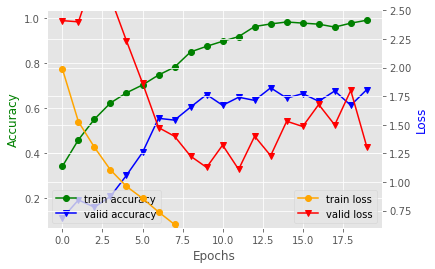

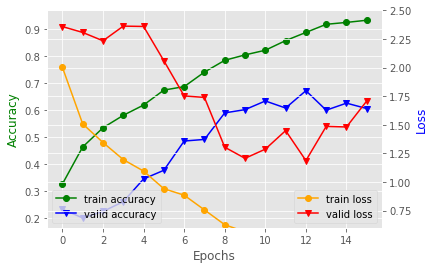

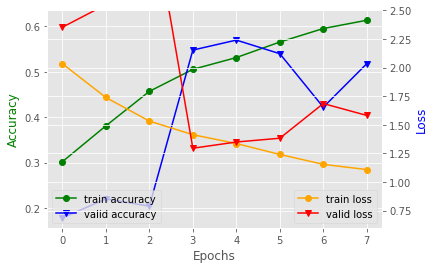

In [41]:
# Plot the learning progress
batch_norm_network.plot_progress()
batch_droprate_network.plot_progress()
augment_network.plot_progress()

In [42]:
# Compute Valid acc
batch_droprate_network_valid_acc = round(max(batch_droprate_network.history.history['val_accuracy']),2)

In [43]:
# Compute Valid acc
batch_droprate_network_valid_acc = round(max(batch_droprate_network.history.history['val_accuracy']),2)
augment_network_valid_acc = round(max(augment_network.history.history['val_accuracy']),2)

# Compute test acc
batch_droprate_network_test_acc = round(batch_droprate_network.compute_accuracy(data_manager.X_test, data_manager.y_test),2)
augment_network_test_acc = round(augment_network.compute_accuracy(data_manager.X_test, data_manager.y_test),2)

8/8 [==============================] - 0s 46ms/step - loss: 1.5996 - accuracy: 0.4820


In [91]:
# Report Valid and Test Accuracy

print('-------------------------- Valid Accuracy  -------------------------- \n')

print(f' Valid Accuracy of the model with batch norm (drop rate = 0) is {batch_norm_valid_acc}')
print(f' Valid Accuracy of the model with batch norm (drop rate = {best_droprate}) is {batch_droprate_network_valid_acc}')
print(f' Valid Accuracy of the model with batch norm (drop rate = {best_droprate}) with data augmentation is {augment_network_valid_acc}')

    

print('---------------------------------------------------------------------- \n\n')
print('-------------------------- Test Accuracy  -------------------------- \n')

print(f' Test Accuracy of the model with batch norm (drop rate = 0) is {batch_norm_test_acc}')
print(f' Test Accuracy of the model with batch norm (drop rate ={best_droprate}) is {batch_droprate_network_test_acc}')
print(f' Test Accuracy of the model with batch norm (drop rate = 0) with data augmentation is {augment_network_test_acc}')


-------------------------- Valid Accuracy  -------------------------- 

 Valid Accuracy of the model with batch norm (drop rate = 0) is 0.69
 Valid Accuracy of the model with batch norm (drop rate = 0.1) is 0.67
 Valid Accuracy of the model with batch norm (drop rate = 0.1) with data augmentation is 0.57
---------------------------------------------------------------------- 


-------------------------- Test Accuracy  -------------------------- 

 Test Accuracy of the model with batch norm (drop rate = 0) is 0.67
 Test Accuracy of the model with batch norm (drop rate =0.1) is 0.58
 Test Accuracy of the model with batch norm (drop rate = 0) with data augmentation is 0.48


In [45]:
# Select the best parameters
valid_acc_list = [batch_norm_valid_acc,batch_droprate_network_valid_acc,augment_network_valid_acc]
augment_list =[False,False,True]
droprate_list = [0,best_droprate,best_droprate]

selected_best_droprate =droprate_list[np.argmax(valid_acc_list)]
selected_augment  =augment_list[np.argmax(valid_acc_list)]

print(f'Best droprate with batch norm is {selected_best_droprate}')
print(f'Best data Augmentation status is {selected_augment}')

Best droprate with batch norm is 0
Best data Augmentation status is False


<span style="color:red">**Question 3.7**</span> **Exploring Label Smoothing Technique for Improving Generalization Ability.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Label smoothing is a super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate label smoothing technique to the above deep learning model and experiment its performance. There are some papers and documents for label smoothing reference as follows:
- Main paper from Goeff Hinton [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) and a good article [article link](https://towardsdatascience.com/what-is-label-smoothing-108debd7ef06).

You need to extend your model developed above with label smoothing technique, train a model with that code, and write your observations and comments about the result.

#*Write your answer and observation here*

To implement label smoothing, we create label_smoothing_CE class, which initially transform training label into one hot encoding format so that we can use categorical_crossentropy loss function with specified label_smoothing . In the 
YourModel class, we reuse the code from previous sections with additional label smoothing part allowing users to specified label smoothing parameters.

After we build the class, we fit the model with label smoothing  and compare the result to the model without label smoothing. 

As a result, **the model performance with label smoothing at 0.1 (valid accuracy) slightly improve from 69 %  to 71 % .** Label smoothing is the way to generalise multi-class neural network to prevents the network from becoming over-confident, which improve model performance on validation and testing data.

In [46]:
# Create label_smoothing_CE class to put as a loss function in the model
class label_smoothing_CE(tf.keras.losses.Loss):
    def __init__(self, num_classes= len(data_manager.classes),label_smoothing= 0.1,from_logits=False):
        super(label_smoothing_CE, self).__init__()
        self.label_smoothing = label_smoothing
        self.num_classes = num_classes
        self.from_logits = from_logits
    def call(self, y_true, y_pred):
        y_true_1_hot = tf.one_hot(tf.transpose(tf.cast(y_true, tf.int32), perm= [1,0])[0], depth= self.num_classes, axis=-1)
        loss = tf.keras.metrics.categorical_crossentropy(y_true_1_hot, y_pred, label_smoothing = self.label_smoothing, 
                                        from_logits = self.from_logits )
        return loss

In [47]:


class YourModel(DefaultModel):
    
    # Initialise
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 label_smoothing = None):
        super(YourModel, self).__init__(name, width, height, 
                                        depth, num_blocks, 
                                        feature_maps, num_classes,
                                        drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate)
        
        self.label_smoothing = label_smoothing
    
    # Create build_cnn method (Reuse from previous section)
    def build_cnn(self):
        
        #reuse code of previous section here
        self.model = models.Sequential()

        # Each block has the pattern [conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]
        for i in range(self.num_blocks):
            
            # Conv layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same', input_shape=(32,32,3)))
            
            # Batch norm layer if Batch_norm is not none
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            
            # Activation layer
            self.model.add(layers.Activation(self.activation_func))
            
            # Conv layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same'))
            
            # Batch norm layer if batch_norm is not none
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            
            # Activation layer
            self.model.add(layers.Activation(self.activation_func))
            
            # Mean pool layer
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
            
            # Dropout layer
            self.model.add(layers.Dropout(rate=self.drop_rate))
        
        # Flatenning layer
        self.model.add(layers.Flatten())
        
        # Dense Layer
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))
        

        
    # Overwrite fit method 
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        
        #insert your code here
        
        # If batch size is not specified, used the default one
        batch_size = self.batch_size if batch_size is None else batch_size
        
        # If num_epochs is not specified, used the default one
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        
        # Create EarlyStopping object specified the conditions if the valid accuracy do not improve 3 times
        early_checkpoint = EarlyStopping(patience=3, monitor='val_accuracy', mode='max')
        
        # Put early stoping in callbacks list
        callbacks = [early_checkpoint]
        
        ######################################### Label Smoothing #########################################
        # If label smoothing is not None
        if self.label_smoothing is not None:
            
            print(f" ----Label Smoothing at {self.label_smoothing}------")
            # Use label_smoothing CE as a loss function
            self.model.compile(optimizer=self.optimizer, loss= label_smoothing_CE(label_smoothing=self.label_smoothing)
                               , metrics=['accuracy'])
        
        else :
            print(" ----No Label Smoothing ------")
            # Use the same loss (sparse_categorical_crossentropy)
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            
         ####################################################################################################   
        
        
        ######################################### Data Augmentation #########################################
        
        
        # If is_augmentation is True
        if self.is_augmentation :
            
            print(" ----Data Augmentation ------")
            # Generate more image data
            datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1,
                                         rotation_range=10, shear_range= 0.1, zoom_range= 0.1, fill_mode = 'nearest')
            
            # Fit to the training dataset
            datagen.fit(data_manager.X_train)
            it = datagen.flow(data_manager.X_train, data_manager.y_train, batch_size=32)
            batch_images, batch_labels = next(it)
            
            # Fit the model with training dataset with data augmentation
            self.history = self.model.fit(it, 
                                          validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                          epochs = num_epochs,
                                          batch_size = batch_size, 
                                          verbose= self.verbose,
                                          callbacks=callbacks)
            
        # If is_augmentation is False
        else :
            print(" ----No Data Augmentation ------")
            # Fit the model with original training dataset
            self.history = self.model.fit(x = data_manager.X_train, y = data_manager.y_train, 
                                          validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                          epochs = num_epochs, 
                                          batch_size = batch_size, 
                                          verbose= self.verbose,
                                          callbacks=callbacks)    

         ####################################################################################################                

In [48]:
# Create the model with batch norm
label_smoothing_network = YourModel(name='network_5',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= selected_best_droprate, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     learning_rate= 0.001,
                     label_smoothing = 0.1,
                     is_augmentation = selected_augment)

label_smoothing_network.build_cnn()
# label_smoothing_network.summary()

In [49]:
%%time
# Fit the model

print('\n------Start Training Model with label smoothing-----\n\n')

label_smoothing_network.fit(data_manager, batch_size = 64, num_epochs = 20)

print('\n------End Training Model with label smoothing-----\n\n')


------Start Training Model with label smoothing-----


 ----Label Smoothing at 0.1------
 ----No Data Augmentation ------
Epoch 1/20
63/63 [==============================] - 16s 248ms/step - loss: 2.0260 - accuracy: 0.3335 - val_loss: 2.4080 - val_accuracy: 0.1120
Epoch 2/20
63/63 [==============================] - 15s 235ms/step - loss: 1.6846 - accuracy: 0.4650 - val_loss: 2.2798 - val_accuracy: 0.2320
Epoch 3/20
63/63 [==============================] - 15s 236ms/step - loss: 1.5013 - accuracy: 0.5677 - val_loss: 2.4903 - val_accuracy: 0.2020
Epoch 4/20
63/63 [==============================] - 15s 239ms/step - loss: 1.3689 - accuracy: 0.6192 - val_loss: 2.0083 - val_accuracy: 0.3400
Epoch 5/20
63/63 [==============================] - 15s 238ms/step - loss: 1.2662 - accuracy: 0.6625 - val_loss: 1.9511 - val_accuracy: 0.3920
Epoch 6/20
63/63 [==============================] - 15s 240ms/step - loss: 1.1615 - accuracy: 0.7115 - val_loss: 1.8732 - val_accuracy: 0.4100
Epoch 7/20
63/63 [=

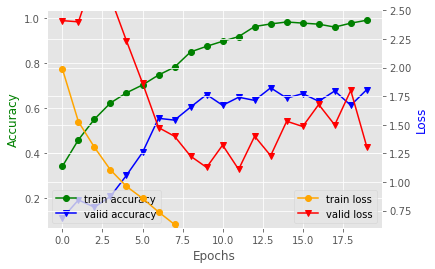

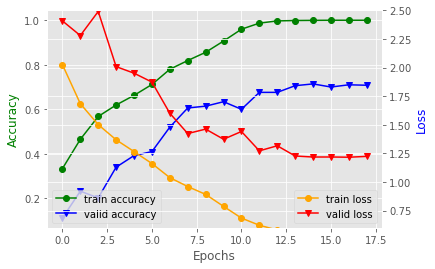

In [50]:
# Plot the learning progress
batch_norm_network.plot_progress()
label_smoothing_network.plot_progress()

In [51]:
# Compute Valid acc
label_smoothing_network_valid_acc = round(max(label_smoothing_network.history.history['val_accuracy']),2)


# Compute test acc
label_smoothing_network_test_acc = round(label_smoothing_network.compute_accuracy(data_manager.X_test, data_manager.y_test),2)


8/8 [==============================] - 0s 52ms/step - loss: 1.2527 - accuracy: 0.7120


In [90]:
# Report Valid and Test Accuracy

print('-------------------------- Valid Accuracy  -------------------------- \n')

print(f' Valid Accuracy of the model with batch norm (drop rate = 0) is {batch_norm_valid_acc}')
print(f' Valid Accuracy of the model with batch norm (drop rate = 0) and label smoothing = 0.1 is {label_smoothing_network_valid_acc}')

    

print('---------------------------------------------------------------------- \n\n')
print('-------------------------- Test Accuracy  -------------------------- \n')


print(f' Test Accuracy of the model with batch norm (drop rate = 0) is {batch_norm_test_acc}')
print(f' Test Accuracy of the model with batch norm (drop rate = 0) and label smoothing = 0.1 is {label_smoothing_network_test_acc}')



-------------------------- Valid Accuracy  -------------------------- 

 Valid Accuracy of the model with batch norm (drop rate = 0) is 0.69
 Valid Accuracy of the model with batch norm (drop rate = 0) and label smoothing = 0.1 is 0.71
---------------------------------------------------------------------- 


-------------------------- Test Accuracy  -------------------------- 

 Test Accuracy of the model with batch norm (drop rate = 0) is 0.67
 Test Accuracy of the model with batch norm (drop rate = 0) and label smoothing = 0.1 is 0.71


<span style="color:red">**Question 3.8**</span> **Exploring Data Mixup Technique for Improving Generalization Ability.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for label smoothing reference as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above with label smoothing technique, train a model with that code, and write your observations and comments about the result.

#*Write your answer and observation here*

To implement data mixup, we initially pre-process the data by convrting the data into tf dataset object, then we create the function to mix up the data. At the end, we train the model with the new data with data mixup.

In our case, data mixup slightly imporve model performance (compare to batch norm with drop rate =0 with no label smoothing) as we can see from valid accuracy is around 70%. Data mixup address the problems about undesirable behaviors such
as memorization and sensitivity to adversarial examples, which helps to regularize the neural network to favor simple linear behavior in-between training example.

However, the performance of model with data mixup is still worse than the model with label smoothing so we will extend label smoothing model the rest of this worksheet as a best model



In [53]:
# Reference : https://keras.io/examples/vision/mixup/

In [54]:
###### Set Hyperparameters######
AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 64
EPOCHS = 10

###### Pre-prcess the data######
# x_train, y_train
x_train =  data_manager.X_train.copy().astype("float32")
y_train =  tf.one_hot( data_manager.y_train, len(data_manager.classes))

# x_valid ,y_train
x_valid =  data_manager.X_valid.copy().astype("float32")
y_valid =  tf.one_hot( data_manager.y_valid, len(data_manager.classes))

# x_test ,y_test
x_test =  data_manager.X_test.copy().astype("float32")
y_test =  tf.one_hot( data_manager.y_test, len(data_manager.classes))

# Convert the data into TensorFlow Dataset objects
train_ds_one = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .shuffle(BATCH_SIZE * 100)
    .batch(BATCH_SIZE)
)

train_ds_two = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .shuffle(BATCH_SIZE * 100)
    .batch(BATCH_SIZE)
)

train_ds = tf.data.Dataset.zip((train_ds_one, train_ds_two))
val_ds = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

In [55]:
# Define the mixup technique function
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


def mix_up(ds_one, ds_two, alpha=0.2):
    # Unpack two datasets
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two
    batch_size = tf.shape(images_one)[0]

    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))

    # Perform mixup on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)

[0.0, 0.0, 0.0, 0.017253994941711426, 0.0, 0.9827460050582886, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.47746431827545166, 0.5225356817245483, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.006217748858034611, 0.0, 0.9937822222709656, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0022258758544921875, 0.9977741241455078, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14659219980239868, 0.8534078001976013, 0.0]
[0.0, 0.0, 0.0007356405258178711, 0.0, 0.0, 0.9992643594741821, 0.0, 0.0, 0.0, 0.0]
[0.9851850271224976, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014814972877502441, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14554964005947113, 0.8544503450393677, 0.0]
[0.0, 0.0, 0.0, 0.25143563747406006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7485643625259399]


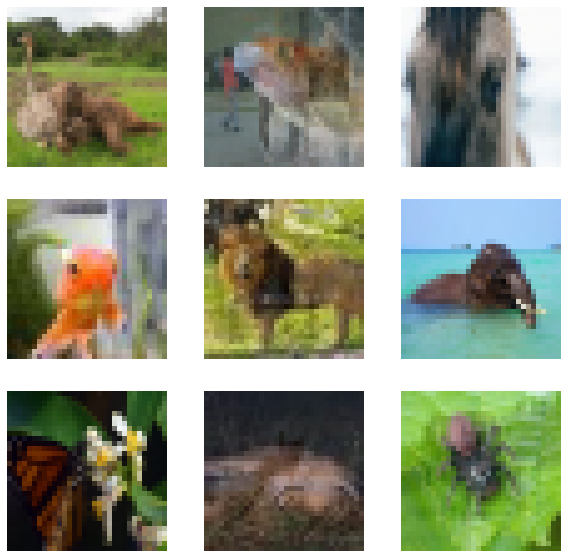

In [56]:
# First create the new dataset using our `mix_up` utility
train_ds_mu = train_ds.map(
    lambda ds_one, ds_two: mix_up(ds_one, ds_two, alpha=0.2), num_parallel_calls=AUTO
)

# Let's preview 9 samples from the dataset
sample_images, sample_labels = next(iter(train_ds_mu))
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(sample_images[:9], sample_labels[:9])):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((image.numpy().squeeze()+1.0)/2)
    print(label.numpy().tolist())
    plt.axis("off")

In [57]:
# Create the model with batch norm
data_mixup_network = YourModel(name='network_6',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= selected_best_droprate, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     learning_rate= 0.001)

data_mixup_network.build_cnn()


In [58]:
# Create 
data_mixup_network_model = data_mixup_network.model

In [59]:
# Fit the model using data mixup dataset
data_mixup_network_model.compile(optimizer=keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
data_mixup_network_model.fit(train_ds_mu, validation_data=val_ds, epochs= 20)

Epoch 1/20
63/63 [==============================] - 19s 283ms/step - loss: 2.0633 - accuracy: 0.3230 - val_loss: 2.5062 - val_accuracy: 0.1680
Epoch 2/20
63/63 [==============================] - 18s 288ms/step - loss: 1.7397 - accuracy: 0.4075 - val_loss: 2.4442 - val_accuracy: 0.1160
Epoch 3/20
63/63 [==============================] - 19s 310ms/step - loss: 1.5783 - accuracy: 0.4915 - val_loss: 2.5762 - val_accuracy: 0.1420
Epoch 4/20
63/63 [==============================] - 37s 596ms/step - loss: 1.4048 - accuracy: 0.5638 - val_loss: 2.2067 - val_accuracy: 0.2080
Epoch 5/20
63/63 [==============================] - 39s 619ms/step - loss: 1.3656 - accuracy: 0.5913 - val_loss: 1.8938 - val_accuracy: 0.3460
Epoch 6/20
63/63 [==============================] - 38s 598ms/step - loss: 1.1980 - accuracy: 0.6470 - val_loss: 1.6723 - val_accuracy: 0.4220
Epoch 7/20
63/63 [==============================] - 39s 615ms/step - loss: 1.1377 - accuracy: 0.6812 - val_loss: 1.3546 - val_accuracy: 0.5360

In [60]:
data_mixup_network_history = data_mixup_network_model.history.history


In [61]:
# Compute Valid acc
data_mixup_network_valid_acc = round(max(data_mixup_network_history['val_accuracy']),2)

test_loss,data_mixup_network_test_acc = data_mixup_network_model.evaluate(test_ds)

data_mixup_network_test_acc = round(data_mixup_network_test_acc,2)
# Compute test acc
# label_smoothing_network_test_acc = round(label_smoothing_network.compute_accuracy(data_manager.X_test, data_manager.y_test),2)
# data_mixup_network_test_acc = data_mixup_network.evaluate(test_ds)

8/8 [==============================] - 0s 51ms/step - loss: 1.1259 - accuracy: 0.6380


In [89]:
# Report Valid and Test Accuracy

print('-------------------------- Valid Accuracy  -------------------------- \n')

print(f' Valid Accuracy of the model with batch norm (drop rate = 0) is {batch_norm_valid_acc}')
print(f' Valid Accuracy of the model with batch norm (drop rate = 0) and label smoothing = 0.1 is {label_smoothing_network_valid_acc}')
print(f' Valid Accuracy of the model with batch norm (drop rate = 0) and data mixup is {data_mixup_network_valid_acc}')
    

print('---------------------------------------------------------------------- \n\n')
print('-------------------------- Test Accuracy  -------------------------- \n')

print(f' Test Accuracy of the model with batch norm (drop rate = 0) is {batch_norm_test_acc}')
print(f' Test Accuracy of the model with batch norm (drop rate = 0) and label smoothing = 0.1 is {label_smoothing_network_test_acc}')
print(f' Test Accuracy of the model with batch norm (drop rate = 0) and data mixup is {data_mixup_network_test_acc}')


-------------------------- Valid Accuracy  -------------------------- 

 Valid Accuracy of the model with batch norm (drop rate = 0) is 0.69
 Valid Accuracy of the model with batch norm (drop rate = 0) and label smoothing = 0.1 is 0.71
 Valid Accuracy of the model with batch norm (drop rate = 0) and data mixup is 0.7
---------------------------------------------------------------------- 


-------------------------- Test Accuracy  -------------------------- 

 Test Accuracy of the model with batch norm (drop rate = 0) is 0.67
 Test Accuracy of the model with batch norm (drop rate = 0) and label smoothing = 0.1 is 0.71
 Test Accuracy of the model with batch norm (drop rate = 0) and data mixup is 0.64


<span style="color:red">**Question 3.9**</span> **Attack your best obtained model with PGD and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.005$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

We implement the PGD and FGSM attacks with  𝜖=0.0313,𝑘=20,𝜂=0.005 on the testing  dataset below.

As a result, we get

- Test Accuracy of the best model on the clean test dataset is 67 %
- Test Accuracy of the best model on the test dataset with pgd attack is 38 %
- Test Accuracy of the best model on the test dataset with fgsm attack is 45 %

In other word, attacks largely downgrade model performance


Also, we illustrate 20 sample clean images and images with attacks belown, which humen eyes cannot distinguish the differences unlike the machine.

In [63]:
import numpy as np

In [64]:
# Return only logit 
class YourAttackModel(YourModel):
    
    # Initialise
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 label_smoothing = False):
        super(YourAttackModel, self).__init__(name, width, height, 
                                              depth, num_blocks, 
                                              feature_maps, 
                                              num_classes, 
                                              drop_rate, 
                                              batch_norm, 
                                              is_augmentation, 
                                               activation_func, 
                                              optimizer, batch_size,
                                              num_epochs, learning_rate,
                                             label_smoothing)
        
        # Create build_cnn method (Reuse from previous section)
    def build_cnn(self):
        
        #reuse code of previous section here
        self.model = models.Sequential()

        # Each block has the pattern [conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]
        for i in range(self.num_blocks):
            
            # Conv layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same', input_shape=(32,32,3)))
            
            # Batch norm layer if Batch_norm is not none
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            
            # Activation layer
            self.model.add(layers.Activation(self.activation_func))
            
            # Conv layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same'))
            
            # Batch norm layer if batch_norm is not none
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            
            # Activation layer
            self.model.add(layers.Activation(self.activation_func))
            
            # Mean pool layer
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
            
            # Dropout layer
            self.model.add(layers.Dropout(rate=self.drop_rate))
        
        # Flatenning layer
        self.model.add(layers.Flatten())
        
        # Dense Layer
        self.model.add(layers.Dense(self.num_classes)) #only return logits without applying softmax
        
        
    # Overwrite fit method 
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        
        #insert your code here
        
        # If batch size is not specified, used the default one
        batch_size = self.batch_size if batch_size is None else batch_size
        
        # If num_epochs is not specified, used the default one
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        
        # Create EarlyStopping object specified the conditions if the valid accuracy do not improve 3 times
        early_checkpoint = EarlyStopping(patience=3, monitor='val_accuracy', mode='max')
        
        # Put early stoping in callbacks list
        callbacks = [early_checkpoint]
        
        ######################################### Label Smoothing #########################################
        # If label smoothing is not None
        if self.label_smoothing is not None:
            
            print(f" ----Label Smoothing at {self.label_smoothing}------")
            # Use label_smoothing CE as a loss function
            self.model.compile(optimizer=self.optimizer, loss= label_smoothing_CE(label_smoothing=self.label_smoothing,
                                                                                 from_logits = True)
                               , metrics=['accuracy'])
        
        else :
            print(" ----No Label Smoothing ------")
            # Use the same loss (sparse_categorical_crossentropy)
            self.model.compile(optimizer=self.optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
                               , metrics=['accuracy'])
            
         ####################################################################################################   
        
        
        ######################################### Data Augmentation #########################################
        
        
        # If is_augmentation is True
        if self.is_augmentation :
            
            print(" ----Data Augmentation ------")
            # Generate more image data
            datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1,
                                         rotation_range=10, shear_range= 0.1, zoom_range= 0.1, fill_mode = 'nearest')
            
            # Fit to the training dataset
            datagen.fit(data_manager.X_train)
            it = datagen.flow(data_manager.X_train, data_manager.y_train, batch_size=32)
            batch_images, batch_labels = next(it)
            
            # Fit the model with training dataset with data augmentation
            self.history = self.model.fit(it, 
                                          validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                          epochs = num_epochs,
                                          batch_size = batch_size, 
                                          verbose= self.verbose,
                                          callbacks=callbacks)
            
        # If is_augmentation is False
        else :
            print(" ----No Data Augmentation ------")
            # Fit the model with original training dataset
            self.history = self.model.fit(x = data_manager.X_train, y = data_manager.y_train, 
                                          validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                          epochs = num_epochs, 
                                          batch_size = batch_size, 
                                          verbose= self.verbose,
                                          callbacks=callbacks)    

         ####################################################################################################                

In [65]:
attacked_label_smoothing_network =  YourAttackModel(name='network_7',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= selected_best_droprate, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     learning_rate= 0.001,
                     label_smoothing = 0.1)

attacked_label_smoothing_network.build_cnn()

In [66]:
%%time
# Fit the model

print('\n------Start Training Model with label smoothing-----\n\n')

attacked_label_smoothing_network.fit(data_manager, batch_size = 64, num_epochs = 20)

print('\n------End Training Model with label smoothing-----\n\n')


------Start Training Model with label smoothing-----


 ----Label Smoothing at 0.1------
 ----No Data Augmentation ------
Epoch 1/20
63/63 [==============================] - 18s 272ms/step - loss: 2.0316 - accuracy: 0.3275 - val_loss: 2.4508 - val_accuracy: 0.1120
Epoch 2/20
63/63 [==============================] - 17s 268ms/step - loss: 1.6716 - accuracy: 0.4782 - val_loss: 2.7307 - val_accuracy: 0.1460
Epoch 3/20
63/63 [==============================] - 17s 274ms/step - loss: 1.5119 - accuracy: 0.5558 - val_loss: 2.7073 - val_accuracy: 0.1640
Epoch 4/20
63/63 [==============================] - 17s 263ms/step - loss: 1.3790 - accuracy: 0.6165 - val_loss: 2.5847 - val_accuracy: 0.2200
Epoch 5/20
63/63 [==============================] - 16s 254ms/step - loss: 1.2641 - accuracy: 0.6693 - val_loss: 2.0974 - val_accuracy: 0.3480
Epoch 6/20
63/63 [==============================] - 16s 262ms/step - loss: 1.1761 - accuracy: 0.7088 - val_loss: 1.8820 - val_accuracy: 0.4100
Epoch 7/20
63/63 [=

In [67]:
attacked_model = attacked_label_smoothing_network.model

In [68]:
# Define function for pgd_attack and fgsm_attack

def pgd_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=-1.0, 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits= True): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy  #compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image, dtype=tf.float32)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label, dtype=tf.float32)
    
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image + random_noise
    
    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits= from_logits) # use ground-truth label to attack
            else: 

                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits= from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)  # clip to a valid range
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
    return adv_image


def fgsm_attack(model, input_image, input_label=None, 
               epsilon=0.3, 
               clip_value_min=-1.0, 
               clip_value_max=1.0, 
               soft_label=False,
               from_logits=True): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector 
    """
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy # compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
    
        
    with tf.GradientTape() as tape: 
        tape.watch(input_image)
        output = model(input_image)
        if not soft_label:
            loss = loss_fn(input_label, output, from_logits=from_logits) # use ground-truth label to attack
        else: 
            pred_label = tf.math.argmax(output, axis=1) # use predicted label to attack
            loss = loss_fn(pred_label, output, from_logits=from_logits)

    gradient = tape.gradient(loss, input_image) # get the gradients of the loss w.r.t. the input image 
    adv_image = input_image + epsilon * tf.sign(gradient) # get the final adversarial examples 
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range  
    adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input
    return adv_image

In [69]:
# pgd attack 
pgd_test_adv = pgd_attack(attacked_model , 
                          data_manager.X_test, 
                          data_manager.y_test,
                          epsilon=0.0313,
                          num_steps=20, 
#                           soft_label=False,
                          step_size=0.005)

pgd_label_test_adv = np.argmax(attacked_model(data_manager.X_test).numpy(), 1)

In [70]:
# fgsm attack
fgsm_test_adv = fgsm_attack(attacked_model , 
                          data_manager.X_test, 
                          data_manager.y_test,
                          epsilon=0.0313)

fgsm_label_test_adv = np.argmax(attacked_model(data_manager.X_test).numpy(), 1)

In [71]:
# Specify number of row and col we want to plot in the graph
num_row = 5
num_col = 4

# Randomly choose data from test set
idx = np.random.choice(len(data_manager.X_test), num_row * num_col)

Original Testing Data


<Figure size 432x720 with 0 Axes>

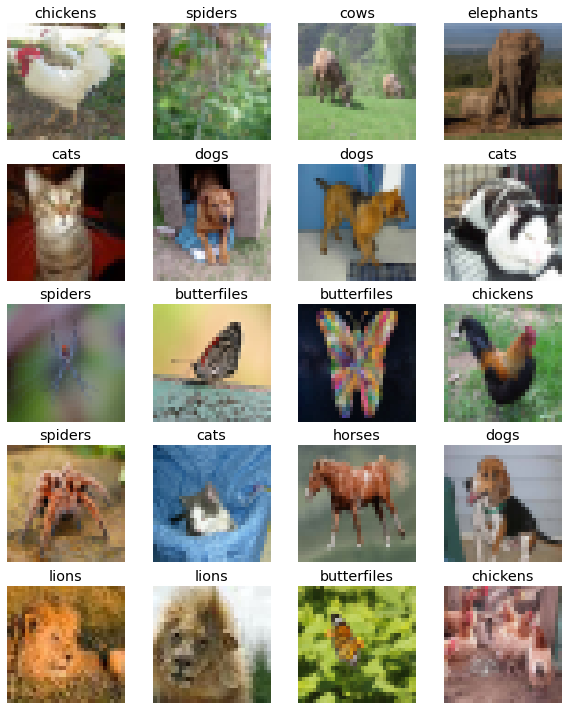

In [72]:


print('Clean Testing Data')
# Create X and y for orginal test set
X = data_manager.X_test.copy()
y = data_manager.y_test.copy()
classes = data_manager.classes.copy()
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
plt.clf()
fig, ax = plt.subplots(num_row, num_col, figsize=(2.5 * num_col, 2.5 * num_row))
for i in range(num_row):
    for j in range(num_col):
        ax[i, j].imshow((X[idx[i * num_col + j]] + 1.0)/2)
        ax[i, j].set_title('{}'.format(classes[y[idx[i * num_col + j]]]))
        
        ax[i, j].grid(False)
        ax[i, j].axis('off')

plt.show()



Testing Data with PGD Attack


<Figure size 432x720 with 0 Axes>

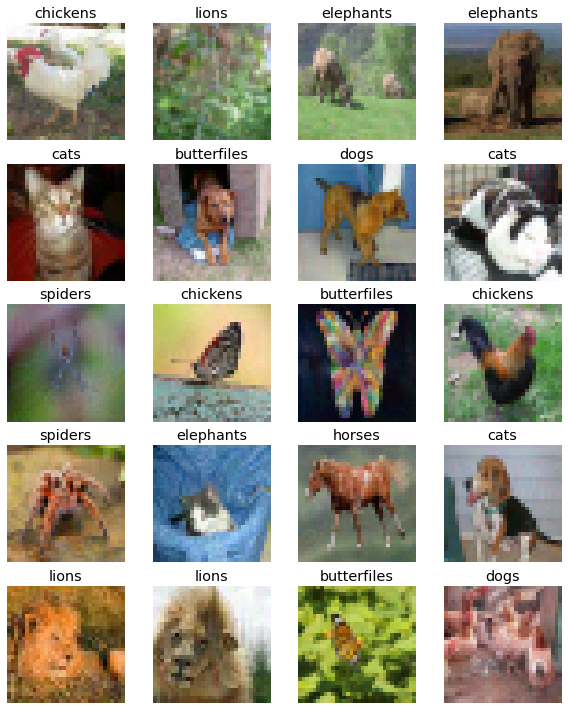

In [73]:
# Create X and y for pgd attack

print('Testing Data with PGD Attack')

X = pgd_test_adv.numpy()
y = pgd_label_test_adv.copy()
classes = data_manager.classes.copy()
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
plt.clf()
fig, ax = plt.subplots(num_row, num_col, figsize=(2.5 * num_col, 2.5 * num_row))
for i in range(num_row):
    for j in range(num_col):
        ax[i, j].imshow((X[idx[i * num_col + j]] + 1.0)/2)
        ax[i, j].set_title('{}'.format(classes[y[idx[i * num_col + j]]]))
        
        ax[i, j].grid(False)
        ax[i, j].axis('off')
plt.show()



Testing Data with fgsm Attack


<Figure size 432x720 with 0 Axes>

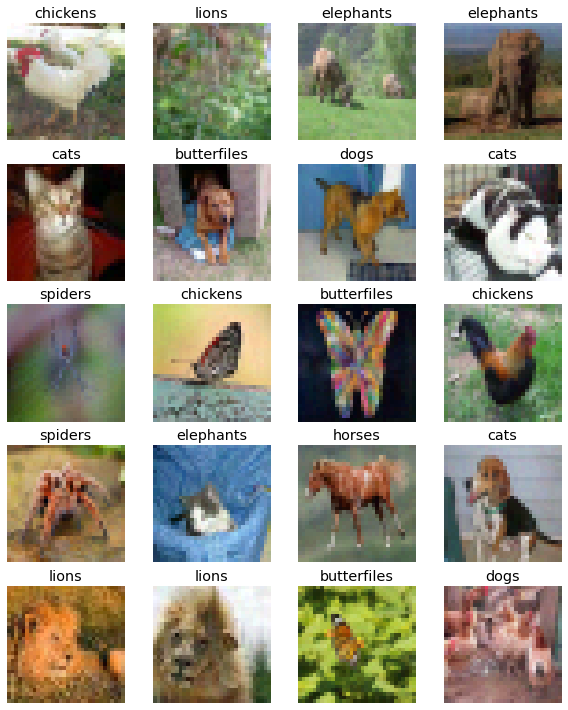

In [74]:
print('Testing Data with fgsm Attack')

# Create X and y for fgsm attack
X = fgsm_test_adv.numpy()
y = fgsm_label_test_adv.copy()
classes = data_manager.classes.copy()
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
plt.clf()
fig, ax = plt.subplots(num_row, num_col, figsize=(2.5 * num_col, 2.5 * num_row))
for i in range(num_row):
    for j in range(num_col):
        ax[i, j].imshow((X[idx[i * num_col + j]] + 1.0)/2)
        ax[i, j].set_title('{}'.format(classes[y[idx[i * num_col + j]]]))
        
        ax[i, j].grid(False)
        ax[i, j].axis('off')
plt.show()

In [75]:
# Evaluate  models on test, pgd and fgsm dataset
original_test_acc = round(attacked_model.evaluate(data_manager.X_test,data_manager.y_test)[1],2)
pgd_test_acc = round(attacked_model.evaluate(pgd_test_adv,pgd_label_test_adv)[1],2)
fgsm_test_acc = round(attacked_model.evaluate(fgsm_test_adv,fgsm_label_test_adv)[1],2)

16/16 [==============================] - 1s 30ms/step - loss: 1.9767 - accuracy: 0.4480


In [76]:
# Report Valid and Test Accuracy

print('-------------------------- Test Accuracy  -------------------------- \n')

print(f' Test Accuracy of the clean test data is {batch_norm_test_acc}')
print(f' Test Accuracy of the pgd attack data is {pgd_test_acc}')
print(f' Test Accuracy of the fgsm attack data is {fgsm_test_acc}')


-------------------------- Test Accuracy  -------------------------- 

 Test Accuracy of the original test data is 0.67
 Test Accuracy of the pgd attack data is 0.38
 Test Accuracy of the of the fgsm attack data is 0.45


<span style="color:red">**Question 3.10**</span> **Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.005}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.005$ on the testing set.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In this part, we develop the robust model using adversarial training with PGD. We found that : 

- The accuracy of the robust model on the clean testing data is 67 %, which is worse than the model (70 %) without considering the attacks. 

- The models, which we save to the ./models, was loaded and was used for evaluation in testing dataset with PGD and FGSM attacks. As a result,the accuracy improve from 38 % to 44% for pgd attack data.

In conclusion, there is trade off between model robustness to attacked dataset and model performance on clean dataset.

In [77]:
import itertools
from sklearn.metrics import accuracy_score

In [78]:
defence_label_smoothing_network_model = attacked_model

In [79]:
optimizer = tf.optimizers.Adam(learning_rate=0.001)
loss_obj = tf.nn.sparse_softmax_cross_entropy_with_logits

# metrics to track the different accuracies.
train_loss = tf.metrics.Mean(name='train_loss')
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()

In [80]:
# Transform dataset into tensor object
x_train = data_manager.X_train.copy().astype("float32")
y_train = data_manager.y_train.copy().astype("int32")
x_test = data_manager.X_test.copy().astype("float32")
y_test = data_manager.y_test.copy().astype("int32")

train_ds_defence = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(BATCH_SIZE)
test_ds_defence = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

In [81]:
# Create train_step_adv function

def train_step_adv(x, x_adv, y):
    with tf.GradientTape() as tape:

        logits = defence_label_smoothing_network_model(x)
#         print(logits.shape)
        logits_adv = defence_label_smoothing_network_model(x_adv)
#         print(logits_adv.shape)
        loss = (loss_obj(y, logits) + loss_obj(y, logits_adv))/2
#         print('check')
        gradients = tape.gradient(loss, defence_label_smoothing_network_model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, defence_label_smoothing_network_model.trainable_variables))
    return loss

In [82]:
# Train the model with attacks

epochs = 5 # number of epochs
for epoch in range(epochs):
    # keras like display of progress
    progress_bar_train = tf.keras.utils.Progbar(60000, verbose=2)
    for (x, y) in train_ds_defence:
       # replace clean example with adversarial example by 10-steps projected_gradient_descent for adversarial training
        x_adv = pgd_attack(defence_label_smoothing_network_model, 
                           x, 
                           y, 
                           epsilon=0.0313,
                           num_steps=10,
                          step_size=0.005, 
                          soft_label=True)
#         print('check1')
        loss = train_step_adv(x, x_adv, y)
#         print('check2')
        y_pred = defence_label_smoothing_network_model(x)
        test_acc_clean(y, y_pred)
        train_loss(loss)
        progress_bar_train.add(x.shape[0], values=[('loss', train_loss.result()), ("acc (%)", test_acc_clean.result() * 100)])

In [83]:
# Evaluate model on original testing dataset with robust model
y_original = []
y_true = []
for X_batch, y_batch in test_ds_defence:

    y_batch_original = np.argmax(defence_label_smoothing_network_model(X_batch).numpy(), 1)
    y_original.append(y_batch_original.tolist())
    y_true.append(y_batch.numpy().tolist())
    
# Convert into flat list
y_original_list = list(itertools.chain(*y_original))
y_true_list  = list(itertools.chain(*y_true))

# Compute test accuracy for original dataset
test_acc = round(accuracy_score(y_original_list, y_true_list),2)
print("Test accuracy for original:{}".format(test_acc))

Test accuracy for original:0.58


In [84]:
# Save the model
defence_label_smoothing_network_model.save('./models')

INFO:tensorflow:Assets written to: ./models\assets


In [85]:
# Load the model
from tensorflow.keras.models import load_model
best_robust_acc_model = load_model('./models', compile=False)



In [86]:
# Predict the data on dataset with attack
y_pgd = []
y_true = []
for X_batch, y_batch in test_ds_defence:
    X_batch_pgd =x_pgd = pgd_attack(best_robust_acc_model, 
                           X_batch, 
                           y_batch, 
                           epsilon=0.0313,
                           num_steps=20,
                          step_size=0.005, 
                          soft_label=True)
    y_batch_pgd = np.argmax(best_robust_acc_model(X_batch_pgd).numpy(), 1)
    y_pgd.append(y_batch_pgd.tolist())
    y_true.append(y_batch.numpy().tolist())
    
# Convert into flat list

y_true_list = list(itertools.chain(*y_true))
y_pgd_list  = list(itertools.chain(*y_pgd))

# Compute test accuracy or the dataset with pgd attack

test_pgd_acc = round(accuracy_score(y_true_list, y_pgd_list),2)
print("Test accuracy for the dataset with pgd attack :{}".format(test_pgd_acc))

Test accuracy for the dataset with pgd attack :0.44


In [87]:
# Predict the data on dataset with fgsm attack
y_fgsm= []
y_true = []
for X_batch, y_batch in test_ds_defence:
    X_batch_fgsm =x_fgsm = fgsm_test_adv = fgsm_attack(best_robust_acc_model , 
                          X_batch, 
                          y_batch,
                          epsilon=0.0313,
                          soft_label=True)
    y_batch_fgsm= np.argmax(best_robust_acc_model(X_batch_fgsm).numpy(), 1)
    y_fgsm.append(y_batch_fgsm.tolist())
    y_true.append(y_batch.numpy().tolist())
    
# Convert into flat list

y_true_list = list(itertools.chain(*y_true))
y_fgsm_list  = list(itertools.chain(*y_fgsm))

# Compute test accuracy or the dataset with fgsm attack

test_fgsm_acc = round(accuracy_score(y_true_list, y_fgsm_list),2)
print("Test accuracy for the dataset with fgsm attack :{}".format(test_fgsm_acc))

Test accuracy for the dataset with fgsm attack :0.37


In [92]:
# Report Valid and Test Accuracy

print('-------------------------- Test Accuracy for original model   -------------------------- \n')

print(f' Test Accuracy of the clean test data for original model is {batch_norm_test_acc}')
print(f' Test Accuracy of the pgd attack data for original model is {pgd_test_acc}')
print(f' Test Accuracy of the of the fgsm attack data for original model is {fgsm_test_acc}')

print('\n-------------------------- Test Accuracy for robust model (consider attacks)  -------------------------- \n')

print(f' Test Accuracy of the clean test  data for robust modelis {test_acc}')
print(f' Test Accuracy of the pgd attack data for robust model is {test_pgd_acc}')
print(f' Test Accuracy of the of the fgsm attack data for robust model is {test_fgsm_acc}')

-------------------------- Test Accuracy for original model   -------------------------- 

 Test Accuracy of the clean test data for original model is 0.67
 Test Accuracy of the pgd attack data for original model is 0.38
 Test Accuracy of the of the fgsm attack data for original model is 0.45

-------------------------- Test Accuracy for robust model (consider attacks)  -------------------------- 

 Test Accuracy of the clean test  data for robust modelis 0.58
 Test Accuracy of the pgd attack data for robust model is 0.44
 Test Accuracy of the of the fgsm attack data for robust model is 0.37


--- 
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**
**<div style="text-align: center"> <span style="color:black">GOOD LUCK WITH YOUR ASSIGNMENT 1!</span> </div>**